In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load Zomato dataset
df = pd.read_csv('/content/zomato_reviews.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [ ]:
print("Number of rows in data:", df.shape[0])
print("Number of columns in data:", df.shape[1])

Number of rows in data: 5479
Number of columns in data: 3


In [ ]:
df.rating.value_counts()

rating
5    2288
1    1891
3     474
4     458
2     368
Name: count, dtype: int64

In [ ]:
# Check the null values
df.isnull().sum()

Unnamed: 0    0
rating        0
review        1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0    0
rating        0
review        0
dtype: int64

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df.rating=df.rating.replace([1,2,3],0)
df.rating=df.rating.replace([4,5],1)

In [ ]:
df.head()

,rating,review
0,1,nice
1,1,"best biryani , so supportive staff of outlet ,..."
2,1,delivery boy was very decent and supportive.👌👍
3,0,"worst biryani i have tasted in my life, half o..."
4,1,all food is good and tasty . will order again ...


In [ ]:
df.rating.value_counts()

rating
1    2745
0    2733
Name: count, dtype: int64

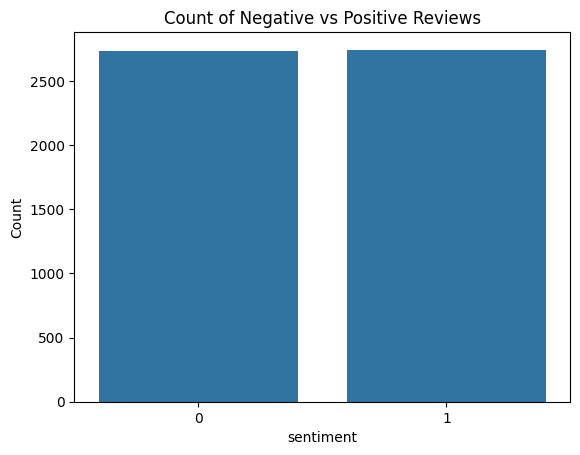

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Recommended IND' is the column of interest
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts())
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Count of Negative vs Positive Reviews')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')

ps =PorterStemmer()

def preprocess_text(text):
    review=re.sub("[^a-zA-Z]"," ",text)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review=" ".join(review)
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [ ]:
df

,rating,review,cleaned_review
0,1,nice,nice
1,1,"best biryani , so supportive staff of outlet ,...",best biryani support staff outlet person order...
2,1,delivery boy was very decent and supportive.👌👍,deliveri boy decent support
3,0,"worst biryani i have tasted in my life, half o...",worst biryani tast life half biryani dustbin
4,1,all food is good and tasty . will order again ...,food good tasti order lot explor bawarchi menu
...,...,...,...
5474,1,complain,complain
5475,1,it took 1 hour to assign valvet and thn prepar...,took hour assign valvet thn prepar food like m...
5476,1,"took for an hour to prepare 3 khawsa, which in...",took hour prepar khawsa real life get prepar m...
5477,0,"very very late, littrally did time pass and it...",late littral time pass item proper


In [ ]:
X = df["cleaned_review"]
y = df["rating"]

In [ ]:
X.head()

0                                                 nice
1    best biryani support staff outlet person order...
2                          deliveri boy decent support
3         worst biryani tast life half biryani dustbin
4       food good tasti order lot explor bawarchi menu
Name: cleaned_review, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000)
X=cv.fit_transform(X).toarray()

In [ ]:
X.shape

(5478, 3952)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
X_train.shape ,X_test.shape,Y_train.shape,Y_test.shape

((4382, 3952), (1096, 3952), (4382,), (1096,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
mb=MultinomialNB()
mb.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
pred=mb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,pred))

0.5264598540145985


In [ ]:
print(confusion_matrix(Y_test,pred))

[[301 246]
 [273 276]]


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       547
           1       0.53      0.50      0.52       549

    accuracy                           0.53      1096
   macro avg       0.53      0.53      0.53      1096
weighted avg       0.53      0.53      0.53      1096



In [ ]:
import numpy as np
pd.DataFrame(np.c_[Y_test,pred],columns=["Actual","Predicted"])

,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
1091,0,0
1092,1,0
1093,1,0
1094,0,0


In [ ]:
import pickle
pickle.dump(cv,open('count-Vectorizer.pkl','wb'))
pickle.dump(mb,open("classifiation.pkl","wb"))

In [ ]:
save_cv=pickle.load(open('count-Vectorizer.pkl','rb'))
model=pickle.load(open("classifiation.pkl","rb"))

In [ ]:
def test_model(sentence):
    sen=save_cv.transform([sentence]).toarray()
    res=model.predict(sen)[0]
    if res==1:
        return "Positive Review"
    else:
        return "Negative review"

In [ ]:
sen ='like review hesit spend much pair jean howev purchas retail day honestli look good probabl would paid full price jean fresh'
res=test_model(sen)
print(res)

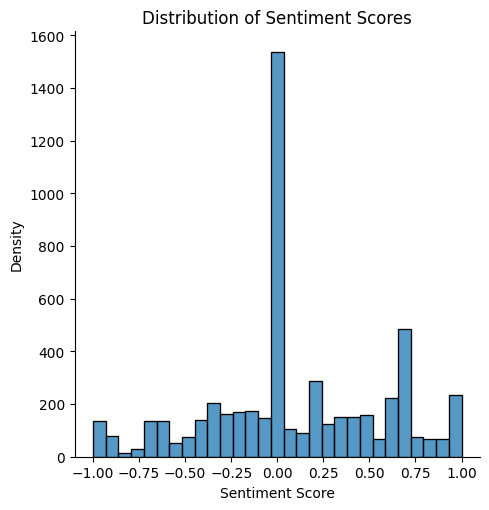

,Unnamed: 0,rating,review,sentiment
0,0,5,nice,0.600000
1,1,5,"best biryani , so supportive staff of outlet ,...",0.616667
2,2,4,delivery boy was very decent and supportive.👌👍,0.216667
3,3,1,"worst biryani i have tasted in my life, half o...",-0.583333
4,4,5,all food is good and tasty . will order again ...,0.600000


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get sentiment
def get_sentiment(text):
    # Creating a TextBlob object
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply the function to reviews
df['sentiment'] = df['review'].apply(get_sentiment)

sns.displot(df['sentiment'])
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()
df.head()

In [ ]:
import nltk
nltk.download('stopwords')

ps =PorterStemmer()

def preprocess_text(text):
    review=re.sub("[^a-zA-Z]"," ",text)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review=" ".join(review)
    return review


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=df[['review']].dropna()

In [ ]:
df['cleaned_data'] = df['review'].apply(preprocess_text)

In [ ]:
df

,review,cleaned_data
0,nice,nice
1,"best biryani , so supportive staff of outlet ,...",best biryani support staff outlet person order...
2,delivery boy was very decent and supportive.👌👍,deliveri boy decent support
3,"worst biryani i have tasted in my life, half o...",worst biryani tast life half biryani dustbin
4,all food is good and tasty . will order again ...,food good tasti order lot explor bawarchi menu
...,...,...
5474,complain,complain
5475,it took 1 hour to assign valvet and thn prepar...,took hour assign valvet thn prepar food like m...
5476,"took for an hour to prepare 3 khawsa, which in...",took hour prepar khawsa real life get prepar m...
5477,"very very late, littrally did time pass and it...",late littral time pass item proper


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_data'])

# Topic Modeling (LDA)
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Print the topics and their top keywords
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

Topic #0:
bad food order tast tasti br money wast horribl spici

Topic #1:
nice quantiti food less qualiti worst tast super price class

Topic #2:
deliveri best order br food excel time late delici great

Topic #3:
biryani tha ok chicken like salad amaz br poor hai

Topic #4:
good tast test food pack servic br awesom cold item

